Import housing csv file

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
data=pd.read_csv("/content/housing.csv")

# Check outlier

Here we can easily identify outliers are present in our data 

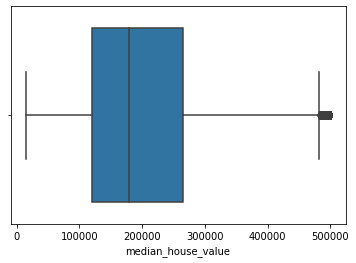

In [4]:
sns.boxplot(x=data['median_house_value'])

Treat outlier

In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
q1 = data['median_house_value'].quantile(0.25)
q3 = data['median_house_value'].quantile(0.75)

iqr = q3-q1
iqr

145125.0

In [9]:
upper_limit =q3 + 1.5 *iqr
lower_limit = q1- 1.5* iqr
upper_limit, lower_limit

(482412.5, -98087.5)

In [10]:
#Elimination of outlier
def limit_imputer(value):
	if value > upper_limit:
		return upper_limit
	if value < lower_limit:
		return lower_limit
	else:
		return value

In [11]:
data['median_house_value'] = data['median_house_value'].apply(limit_imputer)

data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,205981.224976
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,113217.350152
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,482412.500000


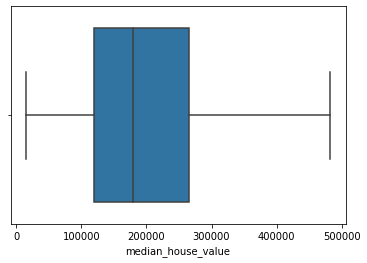

In [12]:
sns.boxplot(x=data['median_house_value'])

# Missing values

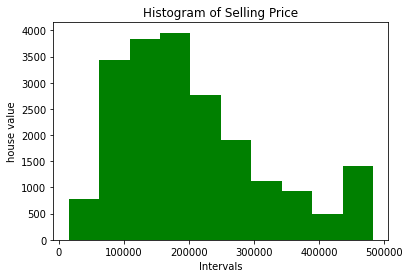

In [14]:
plt.hist(data['median_house_value'], bins = 10, color = 'green')
plt.xlabel("Intervals")
plt.ylabel("house value")
plt.title("Histogram of Selling Price")
plt.show()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
#treating missing value
numerical_columns=["total_bedrooms"]
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="median")
data[numerical_columns]=imputer.fit_transform(data[numerical_columns])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Find ANNOVA

In [20]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [24]:
mod = ols ('median_house_value ~ ocean_proximity',data = data).fit()
Anova_Table = sm.stats.anova_lm(mod, typ = 2)
print(Anova_Table)

                       sum_sq       df            F  PR(>F)
ocean_proximity  6.414510e+13      4.0  1651.165324     0.0
Residual         2.004091e+14  20635.0          NaN     NaN


# Create Dummie variable

In [27]:
#Creating Dummy Variable for Categorical Variable
# ANNOVA value < 0.05 creating dummyy variable
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first = True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_INLAND      20640 non-null  uint8  
 10  ocean_proximity_ISLAND      20640 non-null  uint8  
 11  ocean_proximity_NEAR BAY    20640 non-null  uint8  
 12  ocean_proximity_NEAR OCEAN  20640 non-null  uint8  
dtypes: float64(9), uint8(4)
memory 